<a href="https://colab.research.google.com/github/bmoretz/MSDS-MachineLearning/blob/master/Assignment_02/Assignment_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [0]:
import os
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import urllib.request
from pathlib import Path
import urllib.parse
import random

# Where to save the figures
PROJECT_ROOT_DIR = "."

RANDOM_SEED = 1

# santatize Dataset
def santatize_set( dataframe ):
    if dataframe.isnull().values.any() == True:
        cleaned = dataframe.dropna()
        print('Dropped {} invalid samples'.format(dataframe.count - cleaned.count))
        dataframe = cleaned
    return dataframe

# saves a plot for reporting later. 
def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

# Dataset

In [0]:
# fetch & load data
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/bmoretz/MSDS-MachineLearning/master/"
DATA_PATH = "datasets"
DATA_FILE = "bank.csv"
FILE_URL = "{}/{}/{}".format(DOWNLOAD_ROOT, DATA_PATH, DATA_FILE)

In [0]:
# Load the CSV into a DataFrame
bank = pd.read_csv(FILE_URL, sep = ';')

In [0]:
bank = santatize_set(bank)

In [27]:
list(bank.columns.values)

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'response']

In [28]:
# examine the raw data
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [0]:
# mapping function to convert text no/yes to integer 0/1
convert_to_binary = {'no' : 0, 'yes' : 1}

In [0]:
# Convert yes/no string to binary

# Suggested baseline variables

default = bank['default'].map(convert_to_binary)
housing = bank['housing'].map(convert_to_binary)
loan = bank['loan'].map(convert_to_binary)

# response
response = bank['response'].map(convert_to_binary)

# Data Exploration

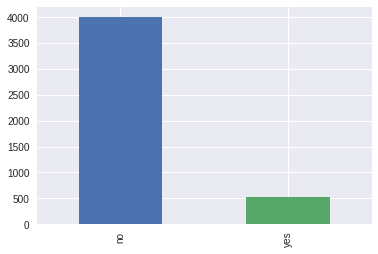

In [32]:
bank['response'].value_counts().plot(kind="bar")
plt.show()

In [33]:
( response == 1 ).sum() / len(response) * 100

11.523999115239992

In [34]:
# What does the average 'yes' person look like?
pd.options.display.float_format = '{:,.2f}'.format
bank.groupby('response').mean() # Note higher balance and duration in 'yes'

,age,balance,day,duration,campaign,pdays,previous
response,,,,,,,
no,41.00,"1,403.21",15.95,226.35,2.86,36.01,0.47
yes,42.49,"1,571.96",15.66,552.74,2.27,68.64,1.09


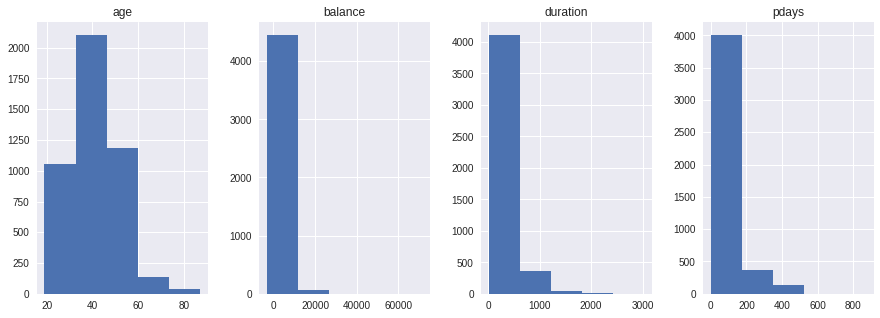

In [35]:
# All Customers
distributions = bank[['age', 'balance', 'duration', 'pdays']].hist( bins = 5, figsize=(15, 5), layout=(1,4))

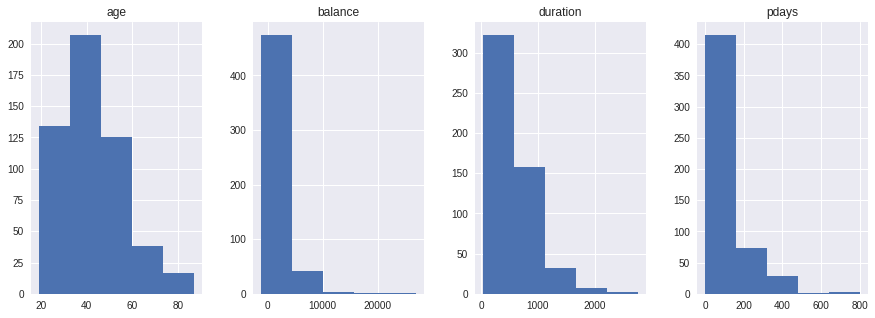

In [36]:
# Participating Customers
distributions = bank[response == 1][['age', 'balance', 'duration', 'pdays']].hist( bins = 5, figsize=(15, 5), layout=(1,4))

In [0]:
def get_pct_interest( df ):
    return 'Interested: {:.2f}'.format( ( df['yes'] / df['no'] ) * 100 )

In [38]:
balances = bank[(bank['balance'] > 5000) & (bank['balance'] < 10000)]['response'].value_counts()
balances

no     188
yes     29
Name: response, dtype: int64

In [39]:
get_pct_interest(balances)

'Interested: 15.43'

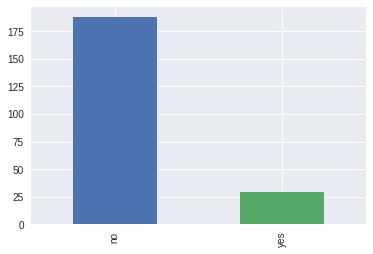

In [40]:
balances.plot(kind="bar")
plt.show()

In [41]:
# break-down of loan for targeted customers
loans = bank[response == 1]['loan'].value_counts()
loans

no     478
yes     43
Name: loan, dtype: int64

In [42]:
get_pct_interest(loans)

'Interested: 9.00'

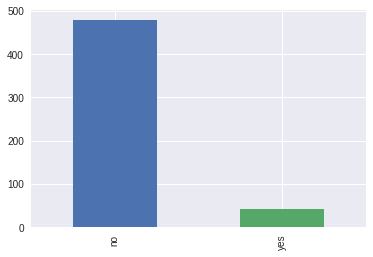

In [43]:
loans.plot(kind="bar")
plt.show()

In [44]:
# break-down of default for targeted customers
defaults = bank[response == 1]['default'].value_counts()
defaults

no     512
yes      9
Name: default, dtype: int64

In [45]:
get_pct_interest(defaults)

'Interested: 1.76'

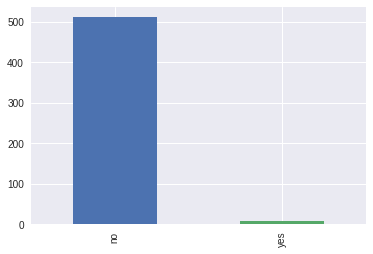

In [46]:
defaults.plot(kind='bar')
plt.show()

In [47]:
# Use age distribution to cut into bins
bank['age_group'] = pd.cut(bank.age, bins=[g for g in range(20, 90, 5)], include_lowest=True)
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,age_group
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no,"(25.0, 30.0]"
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no,"(30.0, 35.0]"
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no,"(30.0, 35.0]"
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no,"(25.0, 30.0]"
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no,"(55.0, 60.0]"


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


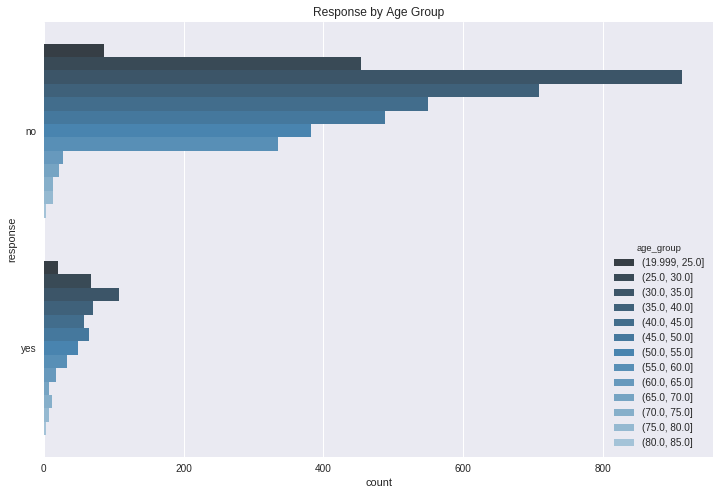

In [48]:
# age classification
fig=plt.figure()
fig, ax = plt.subplots(figsize=(12,8))
sns.countplot(y='response', hue='age_group', data=bank, palette="Blues_d")
plt.title('Response by Age Group')
plt.show()

In [0]:
# Cut balances into 'groups'.
balance_intervals = pd.cut(bank.balance, bins=[g for g in range(-5000, 72000, 2500)], include_lowest=True) # bin avg balance by group

In [50]:
balance_intervals.head()

0       (0.0, 2500.0]
1    (2500.0, 5000.0]
2       (0.0, 2500.0]
3       (0.0, 2500.0]
4      (-2500.0, 0.0]
Name: balance, dtype: category
Categories (30, interval[float64]): [(-5000.001, -2500.0] < (-2500.0, 0.0] < (0.0, 2500.0] <
                                     (2500.0, 5000.0] ... (60000.0, 62500.0] < (62500.0, 65000.0] <
                                     (65000.0, 67500.0] < (67500.0, 70000.0]]

In [0]:
# We could potentially use the intervaled balance data transformed into a normalized value (0,1), however,
# a regular min/max scaler should perform just as well.

# Model Setup

In [0]:
from sklearn.preprocessing import MinMaxScaler

In [0]:
balance_transformed = ( bank.balance / 1.0 ).values.reshape(-1,1)

In [0]:
min_max_scaler = MinMaxScaler(feature_range=(0, 1)).fit(balance_transformed)

In [0]:
balance_scaled = min_max_scaler.transform(balance_transformed)

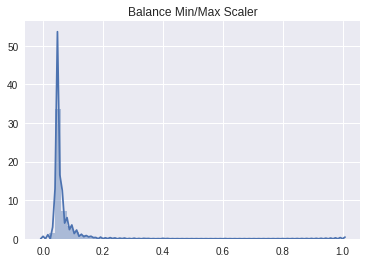

In [56]:
mm_scaler_plot = sns.distplot(balance_scaled).set_title('Balance Min/Max Scaler')

In [0]:
balance_norm = balance_scaled.flatten()

In [58]:
balance_norm.shape

(4521,)

In [59]:
np.array(loan).shape

(4521,)

In [60]:
np.array(default).shape

(4521,)

In [0]:
# Prepare Data for Model
# Let's remove default, as this will simplifiy our model and it seems to have little impact on client interest.
model_data = np.array( [ np.array(housing), np.array(loan), np.array(balance_norm), np.array(response)]).T

In [62]:
np.array( [np.array(loan), np.array(balance_norm) ])

array([[0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.06845546, 0.10875022, 0.06258976, ..., 0.04842888, 0.05973074,
        0.05971732]])

In [0]:
assert len(bank) == len(model_data) # Ensure we have the same number of observations.

In [64]:
model_data.shape

(4521, 4)

In [0]:
# cross-validation scoring code adapted from Scikit Learn documentation
from sklearn.metrics import roc_auc_score

In [66]:
# specify the set of classifiers being evaluated
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression

classifier_names = ["Naive_Bayes", "Logistic_Regression"]

classifiers = [BernoulliNB(alpha=1.0, binarize=0.5, 
                           class_prior = [0.5, 0.5], fit_prior=False), 
               LogisticRegression(solver = 'lbfgs')]

# dimensions of the additive model X input and y response
print('\nData dimensions:', model_data.shape)


Data dimensions: (4521, 4)


In [0]:
# --------------------------------------------------------
# specify the k-fold cross-validation design
from sklearn.model_selection import KFold

In [0]:
# ten-fold cross-validation employed here
N_FOLDS = 10

# set up numpy array for storing results
cv_results = np.zeros((N_FOLDS, len(classifier_names)))

In [69]:
kf = KFold(n_splits = N_FOLDS, shuffle=False, random_state = RANDOM_SEED)

# check the splitting process by looking at fold observation counts
index_for_fold = 0  # fold count initialized

for train_index, test_index in kf.split(model_data):
    print('\nFold index:', index_for_fold,
          '------------------------------------------')
#   note that 0:model_data.shape[1]-1 slices for explanatory variables
#   and model_data.shape[1]-1 is the index for the response variable    
    X_train = model_data[train_index, 0:model_data.shape[1]-1]
    X_test = model_data[test_index, 0:model_data.shape[1]-1]
    y_train = model_data[train_index, model_data.shape[1]-1]
    y_test = model_data[test_index, model_data.shape[1]-1]   

    print('\nShape of input data for this fold:',
          '\nData Set: (Observations, Variables)')
    print('X_train:', X_train.shape)
    print('X_test:',X_test.shape)
    print('y_train:', y_train.shape)
    print('y_test:',y_test.shape)

    index_for_method = 0  # initialize
    for name, clf in zip(classifier_names, classifiers):
        print('\nClassifier evaluation for:', name)
        print('  Scikit Learn method:', clf)
        clf.fit(X_train, y_train)  # fit on the train set for this fold
        # evaluate on the test set for this fold
        y_test_predict = clf.predict_proba(X_test)
        fold_method_result = roc_auc_score(y_test, y_test_predict[:,1]) 
        print('Area under ROC curve:', fold_method_result)
        cv_results[index_for_fold, index_for_method] = fold_method_result
        index_for_method += 1
  
    index_for_fold += 1

cv_results_df = pd.DataFrame(cv_results)
cv_results_df.columns = classifier_names

print('\n----------------------------------------------')
print('Average results from ', N_FOLDS, '-fold cross-validation\n',
      '\nMethod                 Area under ROC Curve', sep = '')     
print(cv_results_df.mean())


Fold index: 0 ------------------------------------------

Shape of input data for this fold: 
Data Set: (Observations, Variables)
X_train: (4068, 3)
X_test: (453, 3)
y_train: (4068,)
y_test: (453,)

Classifier evaluation for: Naive_Bayes
  Scikit Learn method: BernoulliNB(alpha=1.0, binarize=0.5, class_prior=[0.5, 0.5], fit_prior=False)
Area under ROC curve: 0.588184476342371

Classifier evaluation for: Logistic_Regression
  Scikit Learn method: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)
Area under ROC curve: 0.6086744639376218

Fold index: 1 ------------------------------------------

Shape of input data for this fold: 
Data Set: (Observations, Variables)
X_train: (4069, 3)
X_test: (452, 3)
y_train: (4069,)
y_test: (452,)

Classifier evaluation for: Naive_Bayes
  Scikit

In [0]:
# Save the cross-validation results.
cv_results_df = pd.DataFrame(cv_results)
cv_results_df.columns = classifier_names
with open("cv-results.txt", "w") as text_file:
    text_file.write('\nResults from '+ str(N_FOLDS) + '-fold cross-validation\n'+
                     '\nMethod Area under ROC Curve:\n'+ 
                     str(cv_results_df))

In [71]:
pd.options.display.float_format = '{:,.6f}'.format
cv_results_df.mean() # same as the results in the display above

Naive_Bayes           0.609870
Logistic_Regression   0.635276
dtype: float64

# Cross-Validation

In [0]:
# --------------------------------------------------------
# Select method and apply to specific test cases
# --------------------------------------------------------
my_default = np.array([1, 1, 1, 1, 0, 0, 0, 0], np.int32)
my_housing = np.array([1, 1, 0, 0, 1, 1, 0, 0], np.int32)
my_loan = np.array([1, 0, 1, 0, 1, 0, 1, 0], np.int32)
my_balance = np.array([0.711511285478781, 0.0021481256355315725, 0.6445270302627165, 0.4290191027692939, 0.9745602622830137, 0.22044449870397131, 0.9525469584778188, 0.5836707211569383], np.float64)

In [0]:
my_X_test = np.vstack([ my_housing, my_loan, my_balance]).T

In [74]:
# fit logistic regression to full data set
clf = LogisticRegression( solver = 'lbfgs')
X_train = model_data[:, 0:model_data.shape[1]-1]
y_train = model_data[:, model_data.shape[1]-1]
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

In [0]:
# predict specific test cases
y_my_test_predict = clf.predict_proba(my_X_test)

In [76]:
y_scores = clf.decision_function(my_X_test)
y_scores

array([-2.84598588, -2.28542119, -2.21818891, -1.53770368, -2.78211094,
       -2.23241331, -2.14339388, -1.50015036])

# Summary

In [77]:
# create DataFrame for displaying test cases and predicted probabilities
my_targeting_df = pd.DataFrame(np.hstack([my_X_test, y_my_test_predict]))
my_targeting_df.columns = ['housing', 'loan', 'balance',
                           'predict_NO', 'predict_YES']
print('\n\nLogistic regression model predictions for test cases:')
print(my_targeting_df)



Logistic regression model predictions for test cases:
   housing     loan  balance  predict_NO  predict_YES
0 1.000000 1.000000 0.711511    0.945111     0.054889
1 1.000000 0.000000 0.002148    0.907662     0.092338
2 0.000000 1.000000 0.644527    0.901871     0.098129
3 0.000000 0.000000 0.429019    0.823131     0.176869
4 1.000000 1.000000 0.974560    0.941701     0.058299
5 1.000000 0.000000 0.220444    0.903123     0.096877
6 0.000000 1.000000 0.952547    0.895050     0.104950
7 0.000000 0.000000 0.583671    0.817597     0.182403
